# Project 1: Predicting Housing Prices in Cook County

## Introduction

After reading the Chicago Tribune's four part piece about Cook County's property tax system, I became interested in how challenging it would be to develop an effective model using data that inherently contains bias, influenced by historical and racial contexts like redlining. 

The Chicago Tribune's investigation uncovered that Cook County's tax system disproportionately benefits wealthy, typically white homeowners, while placing a heavier financial burden on poorer, minority homeowners. The fundamental issue lies in how properties are valued, with assessments often inflating home values in working-class neighborhoods beyond their true market prices, meaning they have to pay proportionately higher property taxes that they may not be able to afford. Despite attempts to address these inequalities starting in 2013, disparities continue to persist, reflecting broader concerns about algorithmic bias and discrimination in data-driven decision-making. Therefore, as someone interested in understanding the real-life impacts of modeling, I aim to develop the most accurate linear model I can for predicting housing sales prices.

In the first part of this project, I will conduct EDA to gain insights into the data structure. Additionally, I will enhance the dataset by introducing new features and ensuring the data is cleaned thoroughly.

In the second part of this project, I will proceed to specify and train a linear model aimed at predicting housing prices. Finally, I will assess the model's accuracy and explore strategies to enhance its performance.

In [277]:
import numpy as np

import pandas as pd
from pandas.api.types import CategoricalDtype

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

import zipfile
import os

# Plot settings
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

<br/>
<hr style="border: 1px solid #fdb515;" />

# The Data

The data set I will be working with has 61 features in total; the 62nd is sales price, which I will be predicting with my linear regression model. An explanation of each variable can be found in the included `codebook.txt` file. 

The data are split into training and test sets. I will only be working on the training set for the first protion of the project, which has 204,792 observations.

First, I extract the data from the `cook_county_data.zip`.

In [231]:
with zipfile.ZipFile('cook_county_data.zip') as item:
    item.extractall()

In [232]:
training_data = pd.read_csv("cook_county_train.csv", index_col='Unnamed: 0')

In [233]:
len(training_data)

204792

In [234]:
training_data.shape 

(204792, 62)

In [235]:
training_data.head()

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Sale Month of Year,Sale Half of Year,Most Recent Sale,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size
0,17294100610000,203,50,2500.0,76,0.0,2.0,1.0,1.0,3.0,...,9,2,1.0,13.2,0,0.0,50,7650,"This property, sold on 09/14/2015, is a one-st...",2500.0
1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,1.0,...,5,1,1.0,9.6,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0
2,25221150230000,202,210,4375.0,70,0.0,2.0,1.0,2.0,3.0,...,2,1,0.0,11.2,1,1.0,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0
3,10251130030000,203,220,4375.0,17,0.0,3.0,1.0,1.0,3.0,...,7,2,1.0,6.3,1,1.0,220,17220,"This property, sold on 07/23/2013, is a one-st...",4375.0
4,31361040550000,202,120,8400.0,32,0.0,3.0,1.0,2.0,3.0,...,6,1,0.0,6.3,1,1.0,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0


In [236]:
training_data.columns.values

array(['PIN', 'Property Class', 'Neighborhood Code', 'Land Square Feet',
       'Town Code', 'Apartments', 'Wall Material', 'Roof Material',
       'Basement', 'Basement Finish', 'Central Heating', 'Other Heating',
       'Central Air', 'Fireplaces', 'Attic Type', 'Attic Finish',
       'Design Plan', 'Cathedral Ceiling', 'Construction Quality',
       'Site Desirability', 'Garage 1 Size', 'Garage 1 Material',
       'Garage 1 Attachment', 'Garage 1 Area', 'Garage 2 Size',
       'Garage 2 Material', 'Garage 2 Attachment', 'Garage 2 Area',
       'Porch', 'Other Improvements', 'Building Square Feet',
       'Repair Condition', 'Multi Code', 'Number of Commercial Units',
       'Estimate (Land)', 'Estimate (Building)', 'Deed No.', 'Sale Price',
       'Longitude', 'Latitude', 'Census Tract',
       'Multi Property Indicator', 'Modeling Group', 'Age', 'Use',
       "O'Hare Noise", 'Floodplain', 'Road Proximity', 'Sale Year',
       'Sale Quarter', 'Sale Half-Year', 'Sale Quarter of Year'

The "Sale Price" column is what we will be predicting and each row represents an individual property sold. As we mentioned above, certain historical and racial contexts may influence the bias that is present in this dataset which may then influence the accuracy of a model. These biases can manifest through demographic variables such as lattitude and longitude, since we can use the precise location of the house to determine the socioeconomic status of the area where the property is located.

### Sale Price
I begin by examining the distribution of our target variable "Sale Price".  

In [237]:
def plot_distribution(data, label):
    fig, axs = plt.subplots(nrows=2)

    sns.distplot(
        data[label], 
        ax=axs[0]
    )
    
    sns.boxplot(
        x=data[label], 
        ax=axs[1],
        showfliers=False, 
        boxprops=dict(facecolor='white', edgecolor='black'),  
        width=0.3  
    )

    # Align axes
    spacer = np.max(data[label]) * 0.05
    xmin = np.min(data[label]) - spacer
    xmax = np.max(data[label]) + spacer
    axs[0].set_xlim((xmin, xmax))
    axs[1].set_xlim((xmin, xmax))

    # Remove some axis text
    axs[0].xaxis.set_visible(False)
    axs[0].yaxis.set_visible(False)
    axs[1].yaxis.set_visible(False)

    # Put the two plots together
    plt.subplots_adjust(hspace=0)

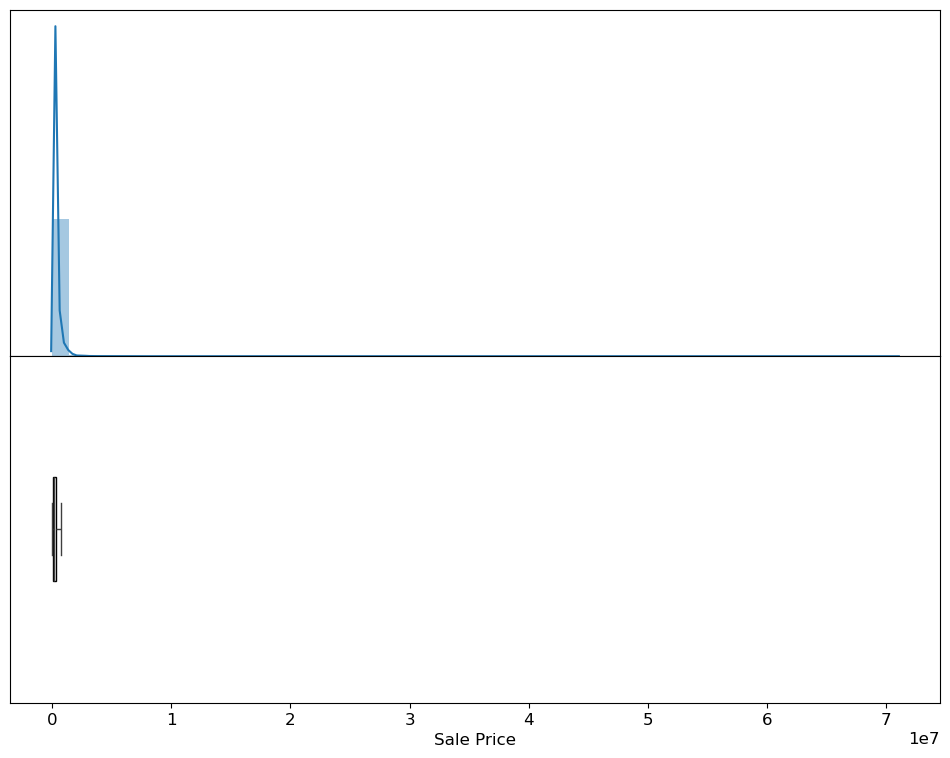

In [238]:
plot_distribution(training_data, label='Sale Price')

It is difficult to see the distribution of the target variable clearly on the current domain since the max is an outlier and is quite far away from the max of the data set, thus we could overcome this transforming the sale prices by taking their log.

In [239]:
training_data['Sale Price'].describe()

count    2.047920e+05
mean     2.451646e+05
std      3.628694e+05
min      1.000000e+00
25%      4.520000e+04
50%      1.750000e+05
75%      3.120000e+05
max      7.100000e+07
Name: Sale Price, dtype: float64

I will focus only on a subset of "Sale Price" for this assignment.

- training_data will contain only households whose price is at least $500.
- training_data will contain a new "Log Sale Price" column that contains the log-transformed sale prices.

In [240]:
training_data = training_data[training_data['Sale Price'] >= 500]
training_data['Log Sale Price'] = np.log(training_data['Sale Price'])

After transforming the data, I will again check the the distribution on the newly log-transformed sale price.

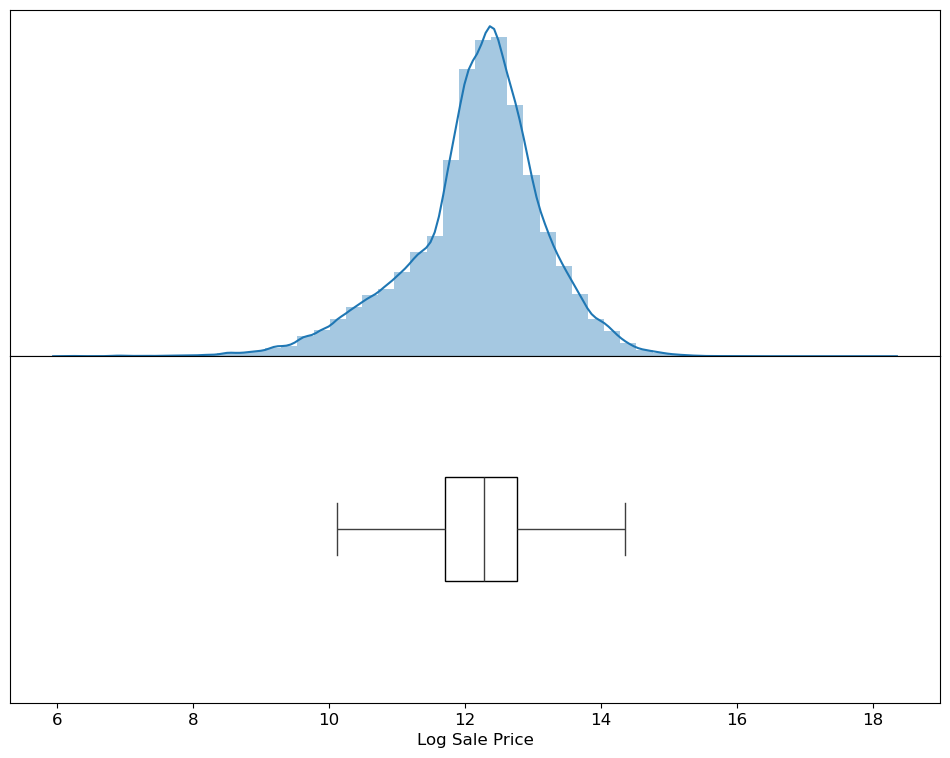

In [241]:
plot_distribution(training_data, label='Log Sale Price')

We notice that the distribution of "Log Sale Price" is symmetric and now much easier to read. Since we are changing the sale price by applying log to it, there will be other variables as well that may be affected by this transformation. For example, the column "Building Square Feet" is likely highly correlated with "Sale Price". Therefore, I will log-transform this column as well. Later, we will see if doing so will help in training my model accuracy.   

In [242]:
training_data['Log Building Square Feet'] = np.log(training_data['Building Square Feet'])

As I continue this project, I may run into more outliers that prevent me from creating a clear visualization or capturing the trend of the majority of the houses. Therefore, I will write a function `remove_outliers` that removes outliers from a data set based off a threshold value of a variable, so I can streamline that process. 

In [243]:
def remove_outliers(data, variable, lower=-np.inf, upper=np.inf):
    """
    Input:
      data (data frame): the table to be filtered
      variable (string): the column with numerical outliers
      lower (numeric): observations with values lower than this will be removed
      upper (numeric): observations with values higher than this will be removed
    
    Output:
      a data frame with outliers removed
      
    Note: This function should not change mutate the contents of data.
    """  
    return data.loc[(data[variable] >= lower) & (data[variable] <= upper)]

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Feature Engineering

In this section I will perform a few feature engineering techniques. 

### Description

I will start by extracting features form the "Description" column as features for the model. For example, the column "Bedrooms" doesn't exist yet in the original dataframe but could be helpful in our predictions.

<br/>
<hr style="border: 1px solid #fdb515;" />


In [244]:
training_data.columns.values

array(['PIN', 'Property Class', 'Neighborhood Code', 'Land Square Feet',
       'Town Code', 'Apartments', 'Wall Material', 'Roof Material',
       'Basement', 'Basement Finish', 'Central Heating', 'Other Heating',
       'Central Air', 'Fireplaces', 'Attic Type', 'Attic Finish',
       'Design Plan', 'Cathedral Ceiling', 'Construction Quality',
       'Site Desirability', 'Garage 1 Size', 'Garage 1 Material',
       'Garage 1 Attachment', 'Garage 1 Area', 'Garage 2 Size',
       'Garage 2 Material', 'Garage 2 Attachment', 'Garage 2 Area',
       'Porch', 'Other Improvements', 'Building Square Feet',
       'Repair Condition', 'Multi Code', 'Number of Commercial Units',
       'Estimate (Land)', 'Estimate (Building)', 'Deed No.', 'Sale Price',
       'Longitude', 'Latitude', 'Census Tract',
       'Multi Property Indicator', 'Modeling Group', 'Age', 'Use',
       "O'Hare Noise", 'Floodplain', 'Road Proximity', 'Sale Year',
       'Sale Quarter', 'Sale Half-Year', 'Sale Quarter of Year'

In [245]:
training_data['Description'][1]

'This property, sold on 05/23/2018, is a one-story houeshold located at 2844 N LOWELL AVE.It has a total of 6 rooms, 3 of which are bedrooms, and 1.0 of which are bathrooms.'

The description also has the date the property was sold on, how many stories the building contains, the address, the number of rooms, bedrooms, and bathrooms. Since I want to avoid multicollinearity, I will pick one feature to extract, which will be bedrooms. Typically the number of bedrooms indicates how many people will be living in that home and how many incomes could be paying for the home. To do this, we will use the following function.

In [246]:
def add_total_bedrooms(data):
    """
    Input:
      data (data frame): a data frame containing at least the Description column.
    """
    with_rooms = data.copy()
    with_rooms['Bedrooms'] = with_rooms['Description'].str.findall(r',\s(\d+)\sof which are bedrooms').fillna(0).str[0].astype(int)
    return with_rooms

training_data = add_total_bedrooms(training_data)

Let's see if I was right in my hypothesis that there is some association between "Bedrooms" and "Log Sale Price".

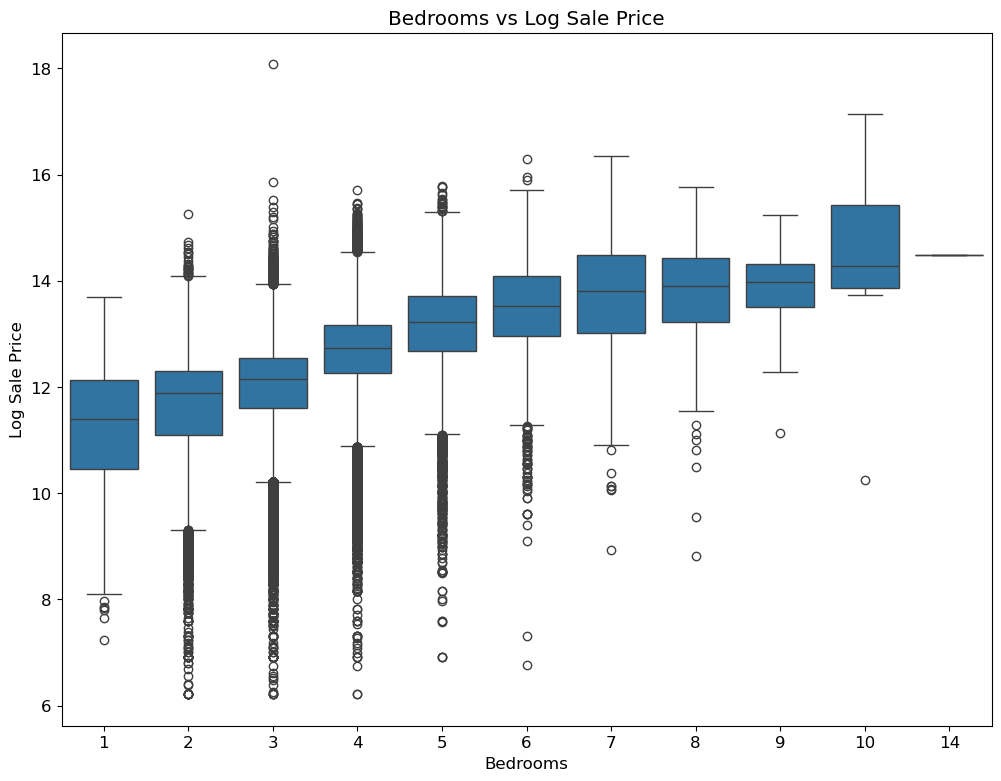

In [247]:
sns.boxplot(data = training_data, x='Bedrooms', y='Log Sale Price')
plt.title('Bedrooms vs Log Sale Price')
plt.show()

There appears to be an association as I hypothesized. The more bedrooms the properties have, the higher the sale price will be.

Now, we will move on to the next veriable and I will take a look at the relationship between neighborhood and sale prices of the houses in our data set.
Currently, there aren'tactual names for the neighborhoods. Instead, there is a similar column `Neighborhood Code` (which is a numerical encoding of the actual neighborhoods by the Assessment office). Before creating any visualization, I will inspect how many different neighborhoods exist in the dataset.

In [248]:
num_neighborhoods = len(training_data['Neighborhood Code'].unique())
num_neighborhoods

193

When I directly plot the distribution of "Log Sale Price" for all of the households in each neighborhood using the `plot_categorical` function from the next cell, I run into the problem of overplotting. This is because there are many different neightborhoods in our dataset.

In [249]:
def plot_categorical(neighborhoods):
    fig, axs = plt.subplots(nrows=2)

    sns.boxplot(
        x='Neighborhood Code',
        y='Log Sale Price',
        data=neighborhoods,
        ax=axs[0],
    )

    sns.countplot(
        x='Neighborhood Code',
        data=neighborhoods,
        ax=axs[1],
    )

    # Draw median price
    axs[0].axhline(
        y=training_data['Log Sale Price'].median(), 
        color='red',
        linestyle='dotted'
    )

    # Label the bars with counts
    for patch in axs[1].patches:
        x = patch.get_bbox().get_points()[:, 0]
        y = patch.get_bbox().get_points()[1, 1]
        axs[1].annotate(f'{int(y)}', (x.mean(), y), ha='center', va='bottom')

    # Format x-axes
    axs[1].set_xticklabels(axs[1].xaxis.get_majorticklabels(), rotation=90)
    axs[0].xaxis.set_visible(False)

    # Narrow the gap between the plots
    plt.subplots_adjust(hspace=0.01)

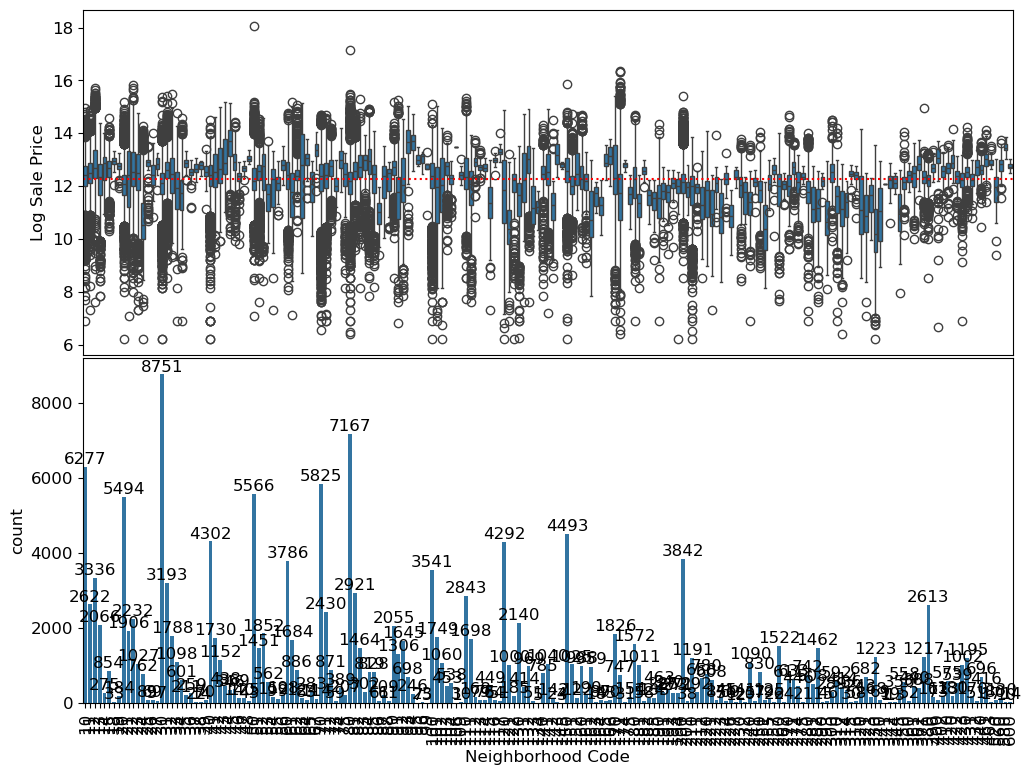

In [250]:
plot_categorical(training_data)

In order to more clearly visualize what is occuring in the data, I will zoom in on a few of these neighborhoods, more specifically, only neighborhoods with the top 20 number of houses.

In [251]:
top_20 = training_data.groupby('Neighborhood Code')['Neighborhood Code'].count().sort_values(ascending = False).head(20).index
in_top_20_neighborhoods = training_data[training_data['Neighborhood Code'].isin(top_20)]
in_top_20_neighborhoods

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Age Decade,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price,Log Building Square Feet,Bedrooms
1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,1.0,...,9.6,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0,12.560244,6.904751,3
4,31361040550000,202,120,8400.0,32,0.0,3.0,1.0,2.0,3.0,...,6.3,1,1.0,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0,10.025705,6.855409,2
8,13232040260000,205,70,3100.0,71,0.0,2.0,2.0,1.0,3.0,...,10.0,1,1.0,70,7170,"This property, sold on 08/25/2016, is a two-st...",3100.0,13.422468,7.636270,4
10,19074270080000,202,380,3750.0,72,0.0,1.0,1.0,2.0,3.0,...,7.4,1,1.0,380,72380,"This property, sold on 05/01/2017, is a one-st...",3750.0,11.695247,6.841615,2
11,15083050330000,203,20,5092.0,31,0.0,2.0,1.0,1.0,1.0,...,5.8,1,1.0,20,3120,"This property, sold on 04/29/2014, is a one-st...",5092.0,11.184421,6.911747,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204781,20361190390000,203,80,4405.0,70,0.0,2.0,1.0,1.0,3.0,...,5.7,1,1.0,80,7080,"This property, sold on 07/15/2013, is a one-st...",4405.0,10.913269,7.141245,3
204785,9284030280000,202,40,6650.0,22,0.0,1.0,1.0,1.0,3.0,...,6.1,1,1.0,40,2240,"This property, sold on 04/03/2014, is a one-st...",6650.0,11.736069,6.761573,3
204786,8141120110000,203,100,10010.0,16,0.0,2.0,1.0,1.0,1.0,...,5.6,1,1.0,100,16100,"This property, sold on 09/08/2016, is a one-st...",10010.0,12.568978,6.948897,3
204790,9242030500000,203,80,6650.0,22,0.0,2.0,1.0,1.0,3.0,...,6.0,1,1.0,80,2280,"This property, sold on 02/22/2018, is a one-st...",6650.0,12.879017,7.092574,3


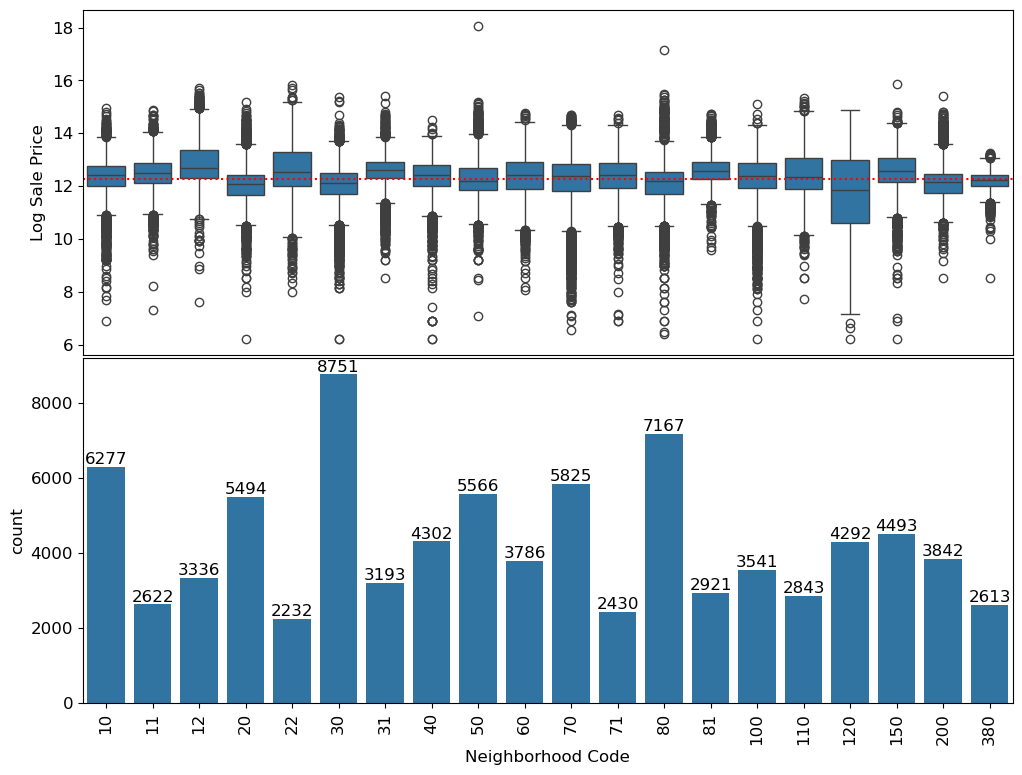

In [252]:
plot_categorical(neighborhoods=in_top_20_neighborhoods)

There is no definitive relationship between the houses' Log Sale Price and their neightborhoods. There is a variation across prices as well as where the data is distributed (there does not seem to be a clear pattern we can identify).

From the above overplotted graph, we notice that there is a lack of data from some neighborhoods. One way to deal with this is to create a new feature that bins neighborhoods together.  For example, I'll take the top 3 neighborhoods measured by median "Log Sale Price" and identify them as "expensive neighborhoods"; the other neighborhoods are not identified as such.

In [253]:
def find_expensive_neighborhoods(data, n=3, metric=np.median):
    """
    Input:
      data (data frame): should contain at least a string-valued 'Neighborhood Code'
        and a numeric 'Sale Price' column
      n (int): the number of top values desired
      metric (function): function used for aggregating the data in each neighborhood.
        for example, np.median for median prices
    
    Output:
      a list of the the neighborhood codes of the top n highest-priced neighborhoods as measured by the metric function
    """
    neighborhoods = data.groupby('Neighborhood Code')['Log Sale Price'].agg(metric).sort_values(ascending = False).head(n).index
    
    # This makes sure the final list contains the generic int type used in Python3, not specific ones used in numpy.
    return [int(code) for code in neighborhoods]

expensive_neighborhoods = find_expensive_neighborhoods(training_data, 3, np.median)
expensive_neighborhoods

[44, 94, 93]

Now, I'll write a function add_expensive_neighborhood that adds a column in_expensive_neighborhood which takes on the value 1 if the house is part of expensive_neighborhoods and the value 0 otherwise. This type of variable is known as an indicator variable.

In [254]:
def add_in_expensive_neighborhood(data, neighborhoods):
    """
    Input:
      data (data frame): a data frame containing a 'Neighborhood Code' column with values
        found in the codebook
      neighborhoods (list of strings): strings should be the names of neighborhoods
        pre-identified as expensive
    Output:
      data frame identical to the input with the addition of a binary
      in_expensive_neighborhood column
    """
    data['in_expensive_neighborhood'] = data['Neighborhood Code'].isin(neighborhoods).astype(int)
    return data

expensive_neighborhoods = find_expensive_neighborhoods(training_data, 3, np.median)
training_data = add_in_expensive_neighborhood(training_data, expensive_neighborhoods)

In [255]:
training_data.head(5)

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price,Log Building Square Feet,Bedrooms,in_expensive_neighborhood
1,13272240180000,202,120,3780.0,71,0.0,2.0,1.0,1.0,1.0,...,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0,12.560244,6.904751,3,0
2,25221150230000,202,210,4375.0,70,0.0,2.0,1.0,2.0,3.0,...,1,1.0,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0,9.998798,6.810142,3,0
3,10251130030000,203,220,4375.0,17,0.0,3.0,1.0,1.0,3.0,...,1,1.0,220,17220,"This property, sold on 07/23/2013, is a one-st...",4375.0,12.323856,7.068172,3,0
4,31361040550000,202,120,8400.0,32,0.0,3.0,1.0,2.0,3.0,...,1,1.0,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0,10.025705,6.855409,2,0
6,30314240080000,203,181,10890.0,37,0.0,1.0,1.0,1.0,3.0,...,1,1.0,181,37181,"This property, sold on 10/26/2017, is a one-st...",10890.0,11.512925,7.458186,4,0


Lastly, I'd like to incorporate some categorical features into my linear model. When looking at `codebook.txt` carefully, we can see that the Assessor's Office uses the following mapping for the numerical values in the "Roof Material" column.
```
Central Heating (Nominal): 

       1	Shingle/Asphalt
       2	Tar&Gravel
       3	Slate
       4	Shake
       5    Tile
       6    Other
```

I will write a function `substitute_roof_material` that replaces each numerical value in "Roof Material" with their corresponding roof material.

In [256]:
def substitute_roof_material(data):
    """
    Input:
      data (data frame): a data frame containing a 'Roof Material' column.  Its values
                         should be limited to those found in the codebook
    Output:
      data frame identical to the input except with a refactored 'Roof Material' column
    """
    data['Roof Material'] =  data['Roof Material'].replace({1: 'Shingle/Asphalt', 2: 'Tar&Gravel', 3: 'Slate', 4: 'Shake', 5: 'Tile', 6: 'Other'})
    return data
    
training_data = substitute_roof_material(training_data)
training_data.head()

,PIN,Property Class,Neighborhood Code,Land Square Feet,Town Code,Apartments,Wall Material,Roof Material,Basement,Basement Finish,...,Pure Market Filter,Garage Indicator,Neigborhood Code (mapping),Town and Neighborhood,Description,Lot Size,Log Sale Price,Log Building Square Feet,Bedrooms,in_expensive_neighborhood
1,13272240180000,202,120,3780.0,71,0.0,2.0,Shingle/Asphalt,1.0,1.0,...,1,1.0,120,71120,"This property, sold on 05/23/2018, is a one-st...",3780.0,12.560244,6.904751,3,0
2,25221150230000,202,210,4375.0,70,0.0,2.0,Shingle/Asphalt,2.0,3.0,...,1,1.0,210,70210,"This property, sold on 02/18/2016, is a one-st...",4375.0,9.998798,6.810142,3,0
3,10251130030000,203,220,4375.0,17,0.0,3.0,Shingle/Asphalt,1.0,3.0,...,1,1.0,220,17220,"This property, sold on 07/23/2013, is a one-st...",4375.0,12.323856,7.068172,3,0
4,31361040550000,202,120,8400.0,32,0.0,3.0,Shingle/Asphalt,2.0,3.0,...,1,1.0,120,32120,"This property, sold on 06/10/2016, is a one-st...",8400.0,10.025705,6.855409,2,0
6,30314240080000,203,181,10890.0,37,0.0,1.0,Shingle/Asphalt,1.0,3.0,...,1,1.0,181,37181,"This property, sold on 10/26/2017, is a one-st...",10890.0,11.512925,7.458186,4,0


Since "Roof Material" is a categorical variable, I will have to one-hot-encode the data. The following function `ohe_roof_material` will return a dataframe with the new columns one-hot-encoded on the roof material of the household. These new columns have the form `x0_MATERIAL`.

In [257]:
from sklearn.preprocessing import OneHotEncoder

def ohe_roof_material(data):
    """
    One-hot-encodes roof material. New columns are of the form x0_MATERIAL.
    """
    copy = data.copy()
    col = copy[['Roof Material']]  # Use double brackets to keep the column as a DataFrame
    enc = OneHotEncoder(handle_unknown='ignore')
    enc.fit(col)
    feature_names = enc.get_feature_names_out(['Roof Material'])
    feature_names = [f"x0_{name.split('_')[-1]}" for name in feature_names]
    res = pd.DataFrame(data=enc.transform(col).toarray(), columns=feature_names)
    copy.reset_index(drop=True, inplace=True)
    res.reset_index(drop=True, inplace=True)
    copy.drop(columns=['Roof Material'], inplace=True)
    return pd.concat([copy, res], axis=1)

training_data = ohe_roof_material(training_data)
training_data.filter(regex='^x0').head(10)

,x0_Other,x0_Shake,x0_Shingle/Asphalt,x0_Slate,x0_Tar&Gravel,x0_Tile
0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,1.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,0.0,1.0,0.0,0.0,0.0
9,0.0,0.0,1.0,0.0,0.0,0.0


<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Building the Linear Model

Now that I've performed some basic exploratory data analysis (EDA), there are a few new added features to the cleaned up dataset. 

## Description

In this section I will specify and fit a linear model to a few features of the housing data to predict housing prices. Next, I will analyze the error of the model and brainstorm ways to improve the model's performance. Finally, I'll delve deeper into the implications of predictive modeling within the Cook County Assessor's Office (CCAO) case study, especially because statistical modeling is how the CCAO valuates properties. I will also share my thoughts on what fairness might mean to property owners in Cook County.
<br/>
<hr style="border: 1px solid #fdb515;" />

When determining about how much is a house worth, there are many different parties who have different interests in the high or low valuation of a property. For example, homeowners, real estate agents, and local jurisdictions who take care of property tax. Homeowners who may want to sell their house may want the value to be high so that they get the most profit when they do sell. For real estate agents it would depend, they may want it low to incentivise their clients to purchase the home but also high so that they could get a higher cut of money once the home is sold. Local governmental bodies would want values to be higher so that they could collect more property tax.

Therefore, there will also be differnet definitions of fairness. In the following scenarios: 

A homeowner whose home is assessed at a higher price than it would sell for is unfair because the homeowner may have to pay more property tax than they otherwise would need to. An assessment process that systematically overvalues inexpensive properties and undervalues expensive propertiesis unfair because lower income people would have to pay more property tax and higher income people would have to pay less property tax than they actually should.

Keeping these nuances in mind, I will now begin to fit my model. To do so, I'll split the data set into a training set and test set. I will use the training set to fit our model's parameters, and then use the test set to estimate how well our model will perform on unseen data drawn from the same distribution. The training set will be 80% of the data and the test set will be 20% of the data.

In [259]:
# FOR REPRODUCIBLE RESULTS
np.random.seed(1337)

def train_test_split(data):
    data_len = data.shape[0]
    shuffled_indices = np.random.permutation(data_len)
    df = data.iloc[shuffled_indices].reset_index(drop=True)
    indices = df.index.values
    train_indices = indices[0:int(len(df)*0.8)]
    test_indices = indices[int(len(df)*0.8):int(len(df))]
    train = df.iloc[train_indices]
    test = df.iloc[test_indices]
    return train, test

train, test = train_test_split(training_data)

In the feature engineering section, I wrote some functions that added features to the dataset. Instead of manually calling each function to add these features to the dataset, I will encapsulate all of this feature engineering into one "pipeline" function.

In [260]:
def process_data_gm(data, pipeline_functions, prediction_col):
    """Process the data for a guided model."""
    for function, arguments, keyword_arguments in pipeline_functions:
        if keyword_arguments and (not arguments):
            data = data.pipe(function, **keyword_arguments)
        elif (not keyword_arguments) and (arguments):
            data = data.pipe(function, *arguments)
        else:
            data = data.pipe(function)
    X = data.drop(columns=[prediction_col]).to_numpy()
    y = data.loc[:, prediction_col].to_numpy()
    return X, y

In [261]:
def select_columns(data, *columns):
    """Select only columns passed as arguments."""
    return data.loc[:, columns]

def log_transform(data, col):
    """Add the log transformation of a column to the data frame"""
    data['Log ' + col] = np.log(data[col])
    return data

I will begin by training two simple models to see how much I can improve the model's performance by

1st linear model:

$$
\text{Log Sale Price} = \theta_0 + \theta_1 \cdot (\text{Bedrooms})
$$

2nd linear model:

$$
\text{Log Sale Price} = \theta_0 + \theta_1 \cdot (\text{Bedrooms}) + \theta_2 \cdot (\text{Log Building Square Feet})
$$

It is time to prepare the training and validation data for the two models we proposed above. I will reload a fresh dataset from scratch and run them through the following preprocessing steps for each model:

- Perform a `train_test_split` on the original dataset. Let 80% of the set be training data and 20% of the set be validation data.
- For both the training and validation set,
    1. Remove outliers in "Sale Price" by so that we are considering households with a price that is greater than or equal to 500 dollars. 
    2. Apply log transformations to "Sale Price" and the "Building Square Feet" columns to create 2 new columns "Log Sale Price" and "Log Building Square Feet".
    3. Extract the total number of bedrooms into a new column "Bedrooms" from the "Description" column.
    4. Select the columns "Log Sale Price" and "Bedrooms" (and "Log Building Square Feet" for the 2nd model).
    5. Return the design matrix $X$ and the observed vector $y$.
    

I will be assigning the final training data and validation data for both models to the following set of variables:

- 1st Model: `X_train_m1`, `y_train_m1`, `X_test_m1`, `y_test_m1`
- 2nd Model: `X_train_m2`, `y_train_m2`, `X_test_m2`, `y_test_m2`

In [264]:
# Reload the data
full_data = pd.read_csv("cook_county_train.csv")

# Process the data using the pipeline for the first model
np.random.seed(1337)
train_m1, test_m1 = train_test_split(full_data)

m1_pipelines = [
    (remove_outliers, None, {
        'variable': 'Sale Price',
        'lower': 499,
    }),
    (log_transform, None, {'col': 'Sale Price'}), 
    (add_total_bedrooms, None, None),
    (select_columns, ['Log Sale Price', 'Bedrooms'], None)
]


X_train_m1, y_train_m1 = process_data_gm(train_m1, m1_pipelines, 'Log Sale Price')
X_test_m1, y_test_m1 = process_data_gm(test_m1, m1_pipelines, 'Log Sale Price')

In [265]:
# DO NOT CHANGE THIS LINE
np.random.seed(1337)
# DO NOT CHANGE THIS LINE

# Process the data using the pipeline for the second model
train_m2, test_m2 = train_test_split(full_data)

m2_pipelines = [
    (remove_outliers, None, {
        'variable': 'Sale Price',
        'lower': 499,
    }),
    (log_transform, None, {'col': 'Sale Price'}), (log_transform, None, {'col': 'Building Square Feet'}),
    (add_total_bedrooms, None, None),
    (select_columns, ['Log Sale Price', 'Bedrooms', 'Log Building Square Feet'], None)
]

X_train_m2, y_train_m2 = process_data_gm(train_m2, m2_pipelines, 'Log Sale Price')
X_test_m2, y_test_m2 = process_data_gm(test_m2, m2_pipelines, 'Log Sale Price')

Then, we will fit our linear regression models.

In [266]:
from sklearn import linear_model as lm

linear_model_m1 = lm.LinearRegression(fit_intercept=True)
linear_model_m2 = lm.LinearRegression(fit_intercept=True)
# Fit the 1st model
linear_model_m1.fit(X_train_m1, y_train_m1)
# Compute the fitted and predicted values of Log Sale Price for 1st model
y_fitted_m1 = linear_model_m1.predict(X_train_m1)
y_predicted_m1 = linear_model_m1.predict(X_test_m1)
# Fit the 2nd model
linear_model_m2.fit(X_train_m2, y_train_m2)
# Compute the fitted and predicted values of Log Sale Price for 2nd model
y_fitted_m2 = linear_model_m2.predict(X_train_m2)
y_predicted_m2 = linear_model_m2.predict(X_test_m2)

As mentioned above, I will compare the performance of our two regression models using the Root Mean Squared Error function I've defined below.

$$RMSE = \sqrt{\dfrac{\sum_{\text{houses in test set}}(\text{actual price for house} - \text{predicted price for house})^2}{\text{number of of houses}}}$$

In [267]:
def rmse(predicted, actual):
    """
    Calculates RMSE from actual and predicted values
    Input:
      predicted (1D array): vector of predicted/fitted values
      actual (1D array): vector of actual values
    Output:
      a float, the root-mean square error
    """
    return np.sqrt(np.mean((actual - predicted)**2))

In [268]:
# Training and test errors for the 1st model
training_error_m1 = rmse(y_train_m1, y_fitted_m1)
test_error_m1 = rmse(y_test_m1, y_predicted_m1)

# Training and test errors for the 1st model (in its original values before the log transform)
training_error_m1_delog = rmse(np.exp(y_train_m1), np.exp(y_fitted_m1))
test_error_m1_delog = rmse(np.exp(y_test_m1), np.exp(y_predicted_m1))
    
# Training and test errors for the 2nd model
training_error_m2 = rmse(y_train_m2, y_fitted_m2)
test_error_m2 = rmse(y_test_m2, y_predicted_m2)


# Training and test errors for the 2nd model (in its original values before the log transform)
training_error_m2_delog = rmse(np.exp(y_train_m2), np.exp(y_fitted_m2))
test_error_m2_delog = rmse(np.exp(y_test_m2), np.exp(y_predicted_m2))                          

print("1st Model\nTraining RMSE: {}\nTest RMSE: {}\n".format(training_error_m1, test_error_m1))
print("1st Model (no log transform)\nTraining RMSE: {}\nTest RMSE: {}\n".format(training_error_m1_delog, test_error_m1_delog))
print("2nd Model\nTraining RMSE: {}\nTest RMSE: {}\n".format(training_error_m2, test_error_m2))
print("2nd Model (no log transform)\nTraining RMSE: {}\nTest RMSE: {}\n".format(training_error_m2_delog, test_error_m2_delog))

1st Model
Training RMSE: 0.9025651719699077
Test RMSE: 0.9068644732045896

1st Model (no log transform)
Training RMSE: 382697.7814969904
Test RMSE: 310679.2486611568

2nd Model
Training RMSE: 0.8042009333446841
Test RMSE: 0.8113963052434994

2nd Model (no log transform)
Training RMSE: 325716.408191604
Test RMSE: 254880.42228506136



To look at the differences between the models, let's print their parameters.

In [269]:
# Parameters from 1st model
theta0_m1 = linear_model_m1.intercept_
theta1_m1 = linear_model_m1.coef_[0]

# Parameters from 2nd model
theta0_m2 = linear_model_m2.intercept_
theta1_m2, theta2_m2 = linear_model_m2.coef_

print("1st Model\nθ0: {}\nθ1: {}".format(theta0_m1, theta1_m1))
print("2nd Model\nθ0: {}\nθ1: {}\nθ2: {}".format(theta0_m2, theta1_m2, theta2_m2))

1st Model
θ0: 10.571725401040085
θ1: 0.4969197463141442
2nd Model
θ0: 1.9339633173823714
θ1: -0.030647249803554506
θ2: 1.4170991378689641


Because I introduced a new feature into our model (Log Building Square Feet), which has a higher weight on the Log Sale Price, theta 2 for Log Building Square Feet is larger to than theta 1 for Bedrooms (which has a lower weight). Theta1 was larger in the first model because it was the only feature in that model, so it was difficult to discern how much impact it had on the Log Sale Price.

Another way of understanding the performance of a model is through a plot of the model the residuals versus the observations.

In the cell below, I've plotted the residuals from predicting "Log Sale Price" using **only the 2nd model** against the original "Log Sale Price" for the **test data**.

Text(0, 0.5, 'Original Log Sale Price - Predicted Log Sale Price')

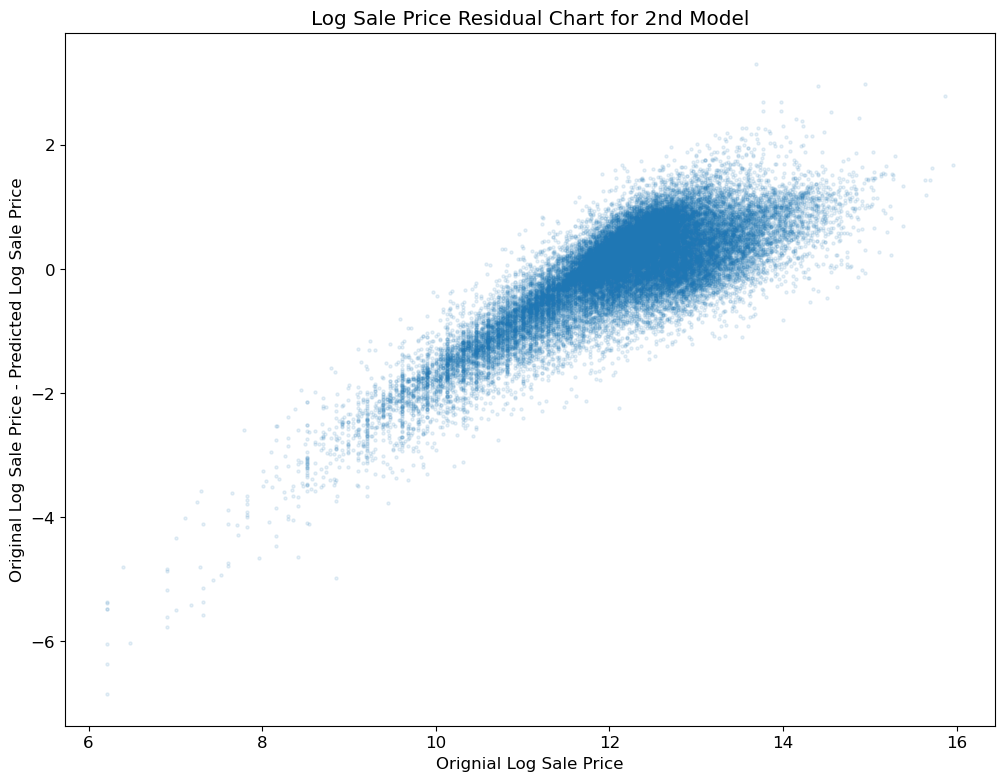

In [270]:
plt.scatter(x = y_test_m2, y = y_test_m2 - y_predicted_m2, s = 5, alpha = 0.1)
plt.title('Log Sale Price Residual Chart for 2nd Model')
plt.xlabel('Orignial Log Sale Price')
plt.ylabel('Original Log Sale Price - Predicted Log Sale Price')

Based on the structure you see in your plot, this model seems like it will correspond to regressive taxation based on it's positive slope. Meaning, as original sale prices increase, the underestimation of high-value houses and overestimation of low-value houses can lead to a situation where cheaper houses are disproportionately advantaged.

## Final Model

I will consider my model well trained once my training RMSE is less than 200k and contest **test** RMSE is less than 240k (note that this is another test set, separate from the test set I used to train the model!)

In [272]:
def squared(data, col):
    """Add the square transformation of a column to the data frame"""
    data['Square ' + col] = (data[col]) ** 2
    return data

def process_data_fm(data, is_test_set=False):
    if not is_test_set:
        data = remove_outliers(data, 'Sale Price', 499, np.percentile(training_data['Sale Price'], 85))
        data = remove_outliers(data, 'Estimate (Building)', np.percentile(training_data['Estimate (Building)'], 10), np.percentile(training_data['Estimate (Building)'], 90))
        data = remove_outliers(data, 'Estimate (Land)', np.percentile(training_data['Estimate (Land)'], 10), np.percentile(training_data['Estimate (Land)'], 90))
        data = remove_outliers(data, 'Building Square Feet', np.percentile(training_data['Building Square Feet'], 10), np.percentile(training_data['Building Square Feet'], 90))
        log_transform(data, 'Sale Price')
        squared(data, 'Fireplaces')
        data['Log Estimate (Building)'] = np.log(data['Estimate (Building)'] + 1)
        data['Log Estimate (Land)'] = np.log(data['Estimate (Land)'] + 1)
        columns = ['Square Bedrooms', 'Log Building Square Feet', 'Log Sale Price', 'Log Estimate (Building)',
                          'Log Estimate (Land)', 'Square Fireplaces', 'Pure Market Filter', 'Latitude', 'Property Class',
                          'Central Air']
        
    else:
        columns = ['Square Bedrooms', 'Log Building Square Feet', 'Log Estimate (Building)',
                          'Log Estimate (Land)', 'Square Fireplaces', 'Pure Market Filter', 'Latitude', 'Property Class',
                          'Central Air']
        squared(data, 'Fireplaces')
        data['Log Estimate (Building)'] = np.log(data['Estimate (Building)'] + 1)
        data['Log Estimate (Land)'] = np.log(data['Estimate (Land)'] + 1)
                
    f_pipelines = [
        (log_transform, None, {'col': 'Building Square Feet'}),
        (add_total_bedrooms, None, None), (squared, None, {'col': 'Bedrooms'}),
        (select_columns, columns, None)
    ]                          
    
    for function, arguments, keyword_arguments in f_pipelines:
        if keyword_arguments and (not arguments):
            data = data.pipe(function, **keyword_arguments)
        elif (not keyword_arguments) and (arguments):
            data = data.pipe(function, *arguments)
        else:
            data = data.pipe(function)
    
    if is_test_set:
        X = data.fillna(0)
        return X
    else:
        X = data.drop(['Log Sale Price'], axis = 1).fillna(0)
        y = data.loc[:, 'Log Sale Price']
        return X, y
    
training_data = pd.read_csv('cook_county_train.csv')
process_data_fm(training_data)

(        Square Bedrooms  Log Building Square Feet  Log Estimate (Building)  \
 1                     9                  6.904751                12.086732   
 3                     9                  7.068172                12.177833   
 9                     9                  7.343426                12.238109   
 10                    4                  6.841615                11.650084   
 11                    9                  6.911747                11.538700   
 ...                 ...                       ...                      ...   
 204780                9                  6.956545                11.421369   
 204781                9                  7.141245                11.689153   
 204786                9                  6.948897                12.149084   
 204790                9                  7.092574                12.354238   
 204791                4                  6.946976                11.663335   
 
         Log Estimate (Land)  Square Fireplaces  P

In [282]:
def delog(y_log):
    return np.exp(y_log)
    
final_model = lm.LinearRegression(fit_intercept=True)

training_data = pd.read_csv('cook_county_train.csv')

X_train, y_train = process_data_fm(training_data)

final_model.fit(X_train, y_train)
y_predicted_train = final_model.predict(X_train)

training_rmse = rmse(delog(y_predicted_train), delog(y_train))
training_rmse

67128.92689124122

<br/><br/>
<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

# Reflection

How exactly does one define fairness?

I used Root Mean Square Error (RMSE) to evaluate my models because it represents the standard deviation of the differences between the actual house values and their predicted values. If predictions are above the line where actual equals predicted (y - ŷ = 0), it suggests the properties are valued lower than their actual worth. Conversely, if predictions are below this line, the properties are valued higher than their actual worth. This regression effect means that lower-income houses, being undervalued, pay more property tax than they should, while higher-income houses, being overvalued, pay less.

Chief Data Officer Rob Ross of the Cook County Assessor’s Office emphasizes that fair property tax rates depend on accurate property assessments—ensuring properties are valued appropriately relative to similar ones. Thus, a more accurate model leads to fairer assessments. The goal for the Cook County Assessor’s Office is to achieve the highest possible accuracy.

When algorithms and statistical models have real-world impacts, fairness becomes a measure of social responsibility. Fairness, however, is complex and multifaceted. It’s not just about technical accuracy but also about understanding broader societal implications. For instance, consider the disproportionate impact on marginalized communities: properties in predominantly Black and Hispanic neighborhoods in Cook County may be consistently overvalued, leading to higher property taxes, while properties in white neighborhoods may be undervalued, resulting in lower taxes. Accurate predictions alone do not address these systemic inequities.

Fairness in property assessments extends beyond the accuracy of the model itself. It involves addressing historical biases and ensuring a just system. Thus, even if my model achieves high accuracy, it does not eliminate inherent data biases.

In reviewing the Residential Automated Valuation Model files in the CCAO’s GitLab, I found the documentation challenging to navigate. The README.md file, which explains the residential valuation model, was hard to locate amidst numerous files. While the file provides a step-by-step explanation of the model, it uses technical jargon that may be inaccessible to a non-technical audience. This highlights the need for greater transparency to develop fairer models in the broader landscape of the data driven world.
